# Step 1: Import Necessary Libraries

In [5]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



In [6]:
# Ensure NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MHS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MHS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

# Step 2: Load and Prepare the Data

## Load the JSON data

In [7]:
# Load the dataset
df = pd.read_json('istanbul_emlakjet_all_records_clean.json')

# Display the first few rows of the DataFrame
df.head()


,id,categoryTypeName,tradeTypeName,estateTypeName,title,url,images,locationSummary,quickInfos,priceDetail,description,info,location
0,14869600,konut,satılık,yazlık,satılık 4+1 bahçe katı yazlık daire,https://imaj.emlakjet.com/ilan/satilik-41-bahc...,[https://imaj.emlakjet.com/listing/14869600/74...,adalar - kınalıada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: Bahçe katı,"{'trendType': None, 'previousCurrency': None, ...",tekinay'da satılık 4+1 bahçe katı yazlık daire...,"{'id': '14869600', 'created_at': '2024-03-17',...","{'summary': 'Adalar - Kınalıada Mahallesi', 'c..."
1,14794365,konut,satılık,daire,büyükada i̇do i̇skelesine yakın konumda 3+1 bl...,https://imaj.emlakjet.com/ilan/buyukada-ido-is...,[https://imaj.emlakjet.com/listing/14794365/4E...,adalar - nizam mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: Düz Giriş (Zemin),"{'trendType': None, 'previousCurrency': None, ...",mega emlak'tan \n\nbüyükada yi̇rmi̇üç ni̇san c...,"{'id': '14794365', 'created_at': '2024-03-02',...","{'summary': 'Adalar - Nizam Mahallesi', 'city'..."
2,14780556,konut,satılık,daire,heybeliada muhteşem deniz manzaralı sahile yak...,https://imaj.emlakjet.com/ilan/heybeliada-muht...,[https://imaj.emlakjet.com/listing/14780556/1F...,adalar - heybeliada mahallesi,Oda Sayısı: 4+1; Bulunduğu Kat: 4. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da tamamen yenilenmiş deniz manzara...,"{'id': '14780556', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
3,14780555,konut,satılık,daire,adalar heybeliada’da satılık 3+1 kat mülkiyetli,https://imaj.emlakjet.com/ilan/adalar-heybelia...,[https://imaj.emlakjet.com/listing/14780555/28...,adalar - heybeliada mahallesi,Oda Sayısı: 3+1; Bulunduğu Kat: 3. Kat,"{'trendType': None, 'previousCurrency': None, ...",heybeliada’da satılık 3+1kat mülkiyetli\n\nhey...,"{'id': '14780555', 'created_at': '2024-02-28',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."
4,14771773,konut,satılık,yalı,prenses adalari heybeli̇de muhteşem deni̇z yal...,https://imaj.emlakjet.com/ilan/prenses-adalari...,[https://imaj.emlakjet.com/listing/14771773/BD...,adalar - heybeliada mahallesi,Oda Sayısı: 9+ Oda,"{'trendType': None, 'previousCurrency': None, ...",-prenses adalari heybeli̇ adada\n\n250 m2 araz...,"{'id': '14771773', 'created_at': '2024-02-27',...","{'summary': 'Adalar - Heybeliada Mahallesi', '..."


## Data Preparation

In [8]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'priceDetail',
       'description', 'info', 'location'],
      dtype='object')


In [9]:
if 'priceDetail' in df.columns:
    price_details = pd.json_normalize(df['priceDetail'])
    df = pd.concat([df.drop(['priceDetail'], axis=1), price_details], axis=1)

if 'info' in df.columns:
    info_details = pd.json_normalize(df['info'])
    df = pd.concat([df.drop(['info'], axis=1), info_details], axis=1)


In [10]:
print(df.columns)

Index(['id', 'categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title',
       'url', 'images', 'locationSummary', 'quickInfos', 'description',
       'location', 'trendType', 'previousCurrency', 'previousPrice',
       'previousValueValid', 'currency', 'price', 'tlPrice',
       'alternativeValue', 'firstPrice', 'differenceRate', 'squareMeterPrice',
       'opportunity', 'id', 'created_at', 'updated_at', 'category',
       'trade_type', 'net_square', 'gross_square', 'room_count', 'build_age',
       'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_o

In [11]:
# Display the data types of each column
print(df.dtypes)


id                   int64
categoryTypeName    object
tradeTypeName       object
estateTypeName      object
title               object
                     ...  
parcel_of_land      object
show_unit_price     object
video_navigable     object
ground_survey       object
flat_per_floor      object
Length: 63, dtype: object


In [12]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['id', 'previousPrice', 'price', 'tlPrice', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'net_square', 'gross_square'],
      dtype='object')


## Removing duplicate columns

In [13]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)


Duplicate columns found: Index(['id'], dtype='object')


In [14]:
# Drop the duplicate column
df.drop(columns=['id'], inplace=True)


In [15]:
duplicate_columns = df.columns[df.columns.duplicated()]
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)

In [16]:
print(df.columns)


Index(['categoryTypeName', 'tradeTypeName', 'estateTypeName', 'title', 'url',
       'images', 'locationSummary', 'quickInfos', 'description', 'location',
       'trendType', 'previousCurrency', 'previousPrice', 'previousValueValid',
       'currency', 'price', 'tlPrice', 'alternativeValue', 'firstPrice',
       'differenceRate', 'squareMeterPrice', 'opportunity', 'created_at',
       'updated_at', 'category', 'trade_type', 'net_square', 'gross_square',
       'room_count', 'build_age', 'floor_number', 'floor_count',
       'heating_type', 'usability', 'suitability_for_credit',
       'suitability_for_investor', 'in_site', 'build_status', 'build_type',
       'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'sh

## Flattening lists

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Flatten nested lists in DataFrame
def flatten_nested_lists(df):
    for col in df.columns:
        df[col] = df[col].apply(lambda x: x[0] if isinstance(x, list) else x)
    return df

df = flatten_nested_lists(df)

def flatten_nested_dicts(df):
    for col in df.columns:
        if df[col].apply(lambda x: isinstance(x, dict)).all():
            df[col] = df[col].apply(lambda x: list(x.values())[0])
    return df

df = flatten_nested_dicts(df)



# Define preprocessing steps for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define which columns are numerical and categorical
numerical_features = df.select_dtypes(include='number').columns
categorical_features = df.select_dtypes(include='object').columns

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

# Convert the processed data back to a DataFrame
processed_df = pd.DataFrame(processed_data)


# Step 3: Further Data Cleaning, Preprocessing

In [18]:
# Filling missing values for numerical features with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].apply(lambda x: x.fillna(x.mean()))

# For categorical features, fill missing values with the mode (most common value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))


C:\Users\MHS\AppData\Local\Temp\ipykernel_7492\3797752546.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode().iloc[0]))


In [19]:
# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=['categoryTypeName', 'estateTypeName'], drop_first=True)


In [20]:
df['build_age'] = df['build_age'].apply(lambda x: int(re.findall('\d+', x)[0]) if pd.notnull(x) else x)


In [21]:
# Function to convert room_count like "4+1" into an integer by summing the parts
def convert_room_count_to_int(room_count):
    if pd.isnull(room_count):
        return None  # Handle missing values
    parts = room_count.split('+')
    try:
        # Convert each part to integer and sum them
        return sum(int(part) for part in parts)
    except ValueError:
        # Handle edge cases where conversion to integer might fail
        return None

df['room_count'] = df['room_count'].apply(convert_room_count_to_int)


In [22]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'heating_type', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_status', 'build_type', 'deed_status', 'mortgage_status',
       'furniture_status', 'subscription_price', 'loan_price', 'trade',
       'bath_count', 'square_of_bath', 'balcony_condition', 'balcony_count',
       'balcony_type', 'square_of_balcony', 'square_of_room', 'wc_count',
       'square_of_wc', 'block_of_buildings', 'sheet', 'parcel_of_land',
       'show_unit_price', 'video_navigable', 'gr

In [23]:
# Function to extract number from strings for 'floor_number' and 'floor_count'
def extract_number_from_string(s):
    # If the string is 'ground floor' or similar, return 0
    if pd.isnull(s):
        return None
    if 'ground' in s.lower():
        return 0
    # Extract number from string
    nums = re.findall('\d+', s)
    return int(nums[0]) if nums else None

# Apply the function to the 'floor_number' and 'floor_count' columns
df['floor_number'] = df['floor_number'].apply(extract_number_from_string)
df['floor_count'] = df['floor_count'].apply(extract_number_from_string)

df['floor_count'] = df['floor_count'].fillna(df['floor_count'].median())


In [24]:
# Apply One-Hot Encoding to 'heating_type' and 'build_status'
df = pd.get_dummies(df, columns=['heating_type', 'build_status'], drop_first=False)



In [25]:
df.columns

Index(['tradeTypeName', 'title', 'url', 'images', 'locationSummary',
       'quickInfos', 'description', 'location', 'trendType',
       'previousCurrency', 'previousPrice', 'previousValueValid', 'currency',
       'price', 'tlPrice', 'alternativeValue', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'opportunity', 'created_at', 'updated_at',
       'category', 'trade_type', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count', 'usability',
       'suitability_for_credit', 'suitability_for_investor', 'in_site',
       'build_type', 'deed_status', 'mortgage_status', 'furniture_status',
       'subscription_price', 'loan_price', 'trade', 'bath_count',
       'square_of_bath', 'balcony_condition', 'balcony_count', 'balcony_type',
       'square_of_balcony', 'square_of_room', 'wc_count', 'square_of_wc',
       'block_of_buildings', 'sheet', 'parcel_of_land', 'show_unit_price',
       'video_navigable', 'ground_survey', 'flat_per_floor',


In [26]:
# Print out numerical features
numerical_features = df.select_dtypes(include='number').columns
print(numerical_features)


Index(['previousPrice', 'price', 'tlPrice', 'firstPrice', 'differenceRate',
       'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
       'build_age', 'floor_number', 'floor_count'],
      dtype='object')


## NLP Preprocessing for listing descriptions

# Step 4: Feature Engineering

In [27]:
from scipy.sparse import hstack
# Set up Turkish stopwords
turkish_stopwords = stopwords.words('turkish')

# Function to preprocess text: tokenize and remove non-alphabetic words and stopwords
def preprocess_text(text):
    # Tokenize by word
    tokens = nltk.word_tokenize(text, language='turkish')
    # Remove non-alphabetic words and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in turkish_stopwords]
    return ' '.join(tokens)

# Apply preprocessing to each document in the property description column
df['description_preprocessed'] = df['description'].fillna('').apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))

# Fit and transform the preprocessed text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description_preprocessed'])

# Define the features excluding text, which will be replaced by TF-IDF features
features =   [  'squareMeterPrice', 'net_square', 'gross_square', 'room_count',
            'build_age', 'floor_number', 'floor_count',
            'estateTypeName_daire', 'estateTypeName_dağ evi', 'estateTypeName_kooperatif',
            'estateTypeName_köy evi', 'estateTypeName_köşk',
            'estateTypeName_müstakil ev', 'estateTypeName_prefabrik',
            'estateTypeName_residence', 'estateTypeName_villa',
            'estateTypeName_yalı', 'estateTypeName_yalı dairesi',
            'estateTypeName_yazlık', 'estateTypeName_çiftlik evi',
            'heating_type_Doğalgaz Sobalı', 'heating_type_Elektrikli Radyatör',
            'heating_type_Fancoil Ünitesi', 'heating_type_Güneş Enerjisi',
            'heating_type_Isı Pompası', 'heating_type_Isıtma Yok',
            'heating_type_Jeotermal', 'heating_type_Kat Kaloriferi',
            'heating_type_Klimalı', 'heating_type_Kombi Doğalgaz',
            'heating_type_Kombi Fueloil', 'heating_type_Kombi Katı Yakıt',
            'heating_type_Merkezi (Pay Ölçer)', 'heating_type_Merkezi Doğalgaz',
            'heating_type_Merkezi Fueloil', 'heating_type_Merkezi Kömür',
            'heating_type_Sobalı', 'heating_type_VRV', 'heating_type_Yerden Isıtma',
            'heating_type_Şömine', 'build_status_Sıfır',
            'build_status_Yapım Aşamasında', 'build_status_İkinci El'] # CHECK THE FEATURES AGAIN
# Ensure only features present in the DataFrame are selected
filtered_features = [feature for feature in features if feature in df.columns]

# Extracting the numerical/categorical features
X_numerical = df[filtered_features].fillna(df[filtered_features].median())

# Standardizing the numerical features
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Concatenate TF-IDF features with the rest of your dataset
X = hstack([X_numerical_scaled, tfidf_matrix])



# Step 5: Training and Testing Data

In [28]:

# Calculating IQR for 'price' to filter outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers based on IQR
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Apply preprocessing and TF-IDF transformation on filtered data
df_filtered['description_preprocessed'] = df_filtered['description'].fillna('').apply(preprocess_text)
tfidf_matrix_filtered = tfidf_vectorizer.fit_transform(df_filtered['description_preprocessed'])

# Extracting numerical/categorical features from filtered DataFrame
X_numerical_filtered = df_filtered[filtered_features].fillna(df_filtered[filtered_features].median())
X_numerical_scaled_filtered = scaler.fit_transform(X_numerical_filtered)

# Concatenating TF-IDF features with numerical/categorical features for filtered data
X_filtered = hstack([X_numerical_scaled_filtered, tfidf_matrix_filtered])

# Updating the target variable to match filtered data
y_filtered = df_filtered['price']

# Splitting the filtered dataset into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'RMSE: {rmse}')
    print(f'R² score: {r2}')
    
    # Plotting Actual vs Predicted prices with error color scale
    errors = y_test - y_pred
    plt.figure(figsize=(12, 8))
    sc = plt.scatter(y_test, y_pred, alpha=0.7, c=errors)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Price with Error Color Scale')
    plt.colorbar(sc, label='Error (Actual - Predicted)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.grid(True)
    plt.show()


C:\Users\MHS\AppData\Local\Temp\ipykernel_7492\2013442365.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['description_preprocessed'] = df_filtered['description'].fillna('').apply(preprocess_text)


Training and evaluating model: LinearRegression
Model: LinearRegression
RMSE: 1596357.4241105602
R² score: 0.5703924099805961


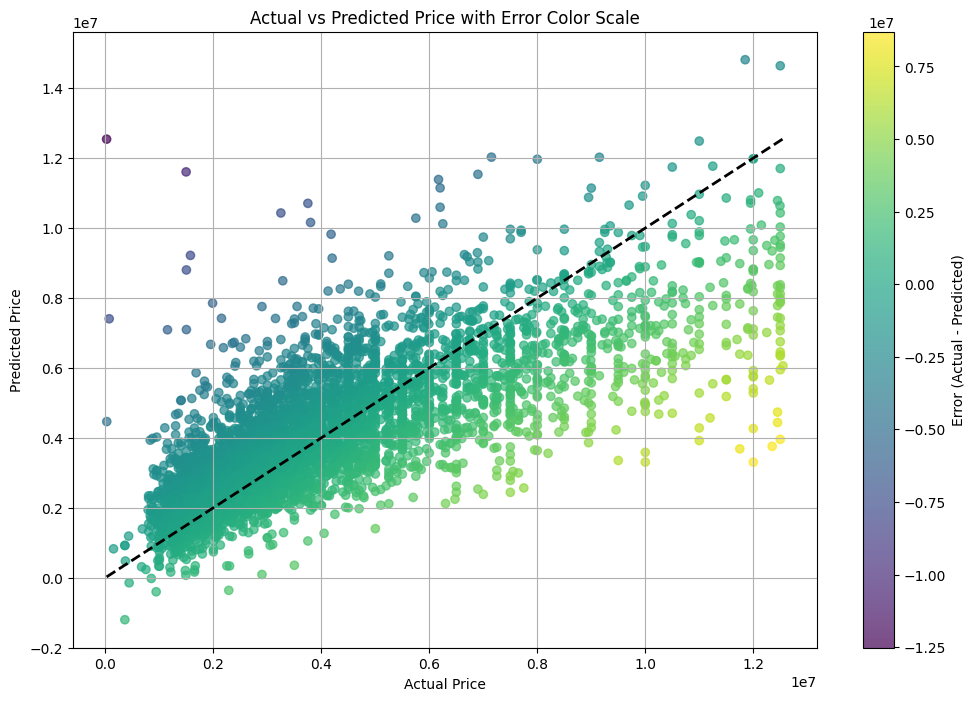

--------------------------------------------------------------------------------
Training and evaluating model: RandomForestRegressor
Model: RandomForestRegressor
RMSE: 1453275.2868130796
R² score: 0.6439529026095064


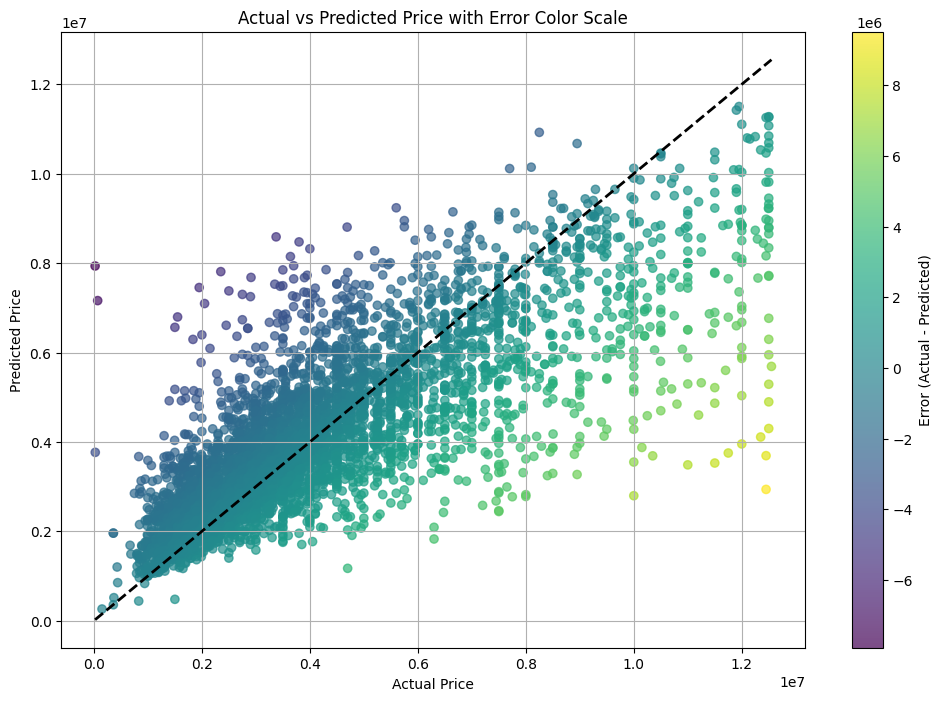

--------------------------------------------------------------------------------
Training and evaluating model: GradientBoostingRegressor
Model: GradientBoostingRegressor
RMSE: 1598252.5401929854
R² score: 0.5693717870254044


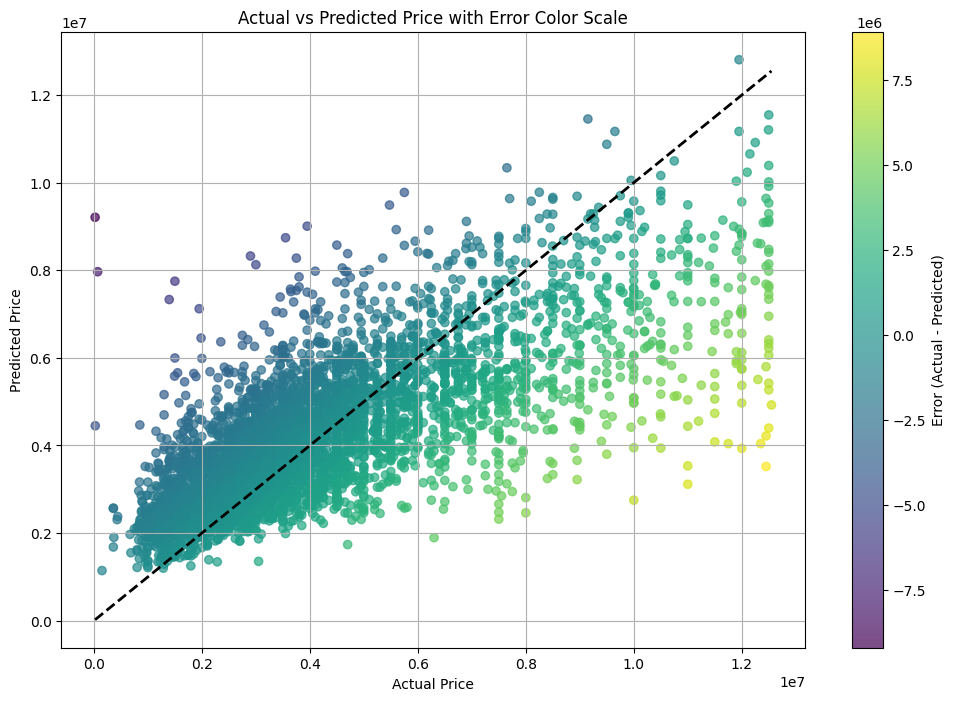

--------------------------------------------------------------------------------


In [29]:

models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
]

# Train and evaluate each model using the filtered and preprocessed dataset
for model in models:
    print(f"Training and evaluating model: {model.__class__.__name__}")
    train_evaluate_model(model, X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered)
    print("-" * 80)  # Print a separator line between model evaluations


In [30]:
# Convert X_filtered from sparse to dense for neural network models
X_dense = X_filtered.toarray() if hasattr(X_filtered, "toarray") else X_filtered

y = y_filtered

def train_evaluate_model_cv(model, X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)

    mse_scores = cross_val_score(model, X, y, cv=kf, scoring=mse_scorer)
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring=r2_scorer)

    rmse_scores = np.sqrt(np.abs(mse_scores))
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Average RMSE: {np.mean(rmse_scores)}')
    print(f'Average R² score: {np.mean(r2_scores)}\n')

X_for_cv = X_dense

# List of models to evaluate
models = [
    LinearRegression(), 
    RandomForestRegressor(n_estimators=100, random_state=42), 
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50,50), random_state=42))
]

# Train and evaluate each model with cross-validation
for model in models:
    train_evaluate_model_cv(model, X_for_cv, y)

Model: LinearRegression
Average RMSE: 1.6327912844098808e+19
Average R² score: -1.4362762211378685e+26

Model: RandomForestRegressor
Average RMSE: 1462373.2893262603
Average R² score: 0.6459202845439259

Model: GradientBoostingRegressor
Average RMSE: 1603010.2330780136
Average R² score: 0.5745356282289489

Model: XGBRegressor
Average RMSE: 1491687.6313773463
Average R² score: 0.6315765883464798

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 138977
[LightGBM] [Info] Number of data points in the train set: 19876, number of used features: 1024
[LightGBM] [Info] Start training from score 4052419.606913
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total

C:\Users\MHS\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MHS\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MHS\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\MHS\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\U

Model: Pipeline
Average RMSE: 1653978.4932614365
Average R² score: 0.5470284424410495



C:\Users\MHS\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
